In [1]:
import os, sys
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
from matplotlib import image

In [2]:
sys.path.append("/home/mila/teaching/user09/data/Train/Image")
sys.path.append("/home/mila/teaching/user09/Facebook-User-Predictions/src")

print(os.getcwd())
print(sys.path)

/home/mila/teaching/user09/data/Train
['/home/mila/teaching/user09/data/Train', '/home/mila/teaching/user09/.conda/envs/fb-env/lib/python37.zip', '/home/mila/teaching/user09/.conda/envs/fb-env/lib/python3.7', '/home/mila/teaching/user09/.conda/envs/fb-env/lib/python3.7/lib-dynload', '', '/home/mila/teaching/user09/.conda/envs/fb-env/lib/python3.7/site-packages', '/home/mila/teaching/user09/.conda/envs/fb-env/lib/python3.7/site-packages/IPython/extensions', '/home/mila/teaching/user09/.ipython', '/home/mila/teaching/user09/data/Train/Image', '/home/mila/teaching/user09/Facebook-User-Predictions/src']


In [3]:
print(os.listdir(os.getcwd() + "/Image/")[1000])
print(len(os.listdir(os.getcwd() + "/Image/")))

a078cb489c2e2cb9bf498a8b43cedb0f.jpg
9500


./Image/f86306c62b3cdbf1d954cbb3e3ac1d03.jpg
uint8
(199, 200, 3)


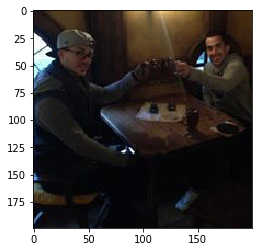

In [13]:
# load and display an image with Matplotlib
from matplotlib import image

file_name = "./Image/" + os.listdir(os.getcwd() + "/Image/")[4]
print(file_name)

# load image as pixel array
data = image.imread(file_name)

# summarize shape of the pixel array
print(data.dtype)
print(data.shape)

# display the array of pixels as an image
plt.imshow(data)

In [17]:
test = detecting_faces(data)
print(test)

draw_faces(data, test)

()


In [16]:
import cv2
from scipy import misc
from PIL import Image

def detecting_faces(image):

    path_weights = "/home/mila/teaching/user09/Facebook-User-Predictions/src/haarcascade_frontalface_default.xml"
    face_cascade = cv2.CascadeClassifier(path_weights)

    coordinates = face_cascade.detectMultiScale(
        image,
        scaleFactor=1.1,
        minNeighbors=5,
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    return coordinates

def draw_faces(image, coordinates):

    for (x, y, w, h) in coordinates: 
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 255), 3)


def expand(coordinates):
    pts = coordinates[0]

    x_min = pts[0]
    y_min = pts[1]
    x_max = pts[0] + pts[2]
    y_max = pts[1] + pts[3]

    x_min = max(0, x_min -(0.15 * pts[2]))
    x_max += (0.15 * pts[2])
    y_min = max(0, y_min -(0.20 * pts[3]))
    y_max += (0.20 * pts[3])
    return [[int(x_min), int(y_min), int(x_max - x_min), int(y_max - y_min)]]


def crop_image(image, coordinates):

    x_min = coordinates[0][0]
    x_max = coordinates[0][0] + coordinates[0][2]
    y_min = coordinates[0][1]
    y_max = coordinates[0][1] + coordinates[0][3]

    image = image[y_min:y_max, x_min:x_max]
    return image


def resize_image(image):
    image = np.array(Image.fromarray(image.astype('uint8'), 'RGB').resize(128, 128))
    return image

In [12]:
start_time = time.time()

img_transformed=[]

for i in range(len(os.listdir(os.getcwd() + "/Image/"))):
    print('step: ', i)
    
    file_name = "./Image/" + os.listdir(os.getcwd() + "/Image/")[i]

    img = image.imread(file_name)
    
    coordinates = detecting_faces(img)
    print(coordinates)
    
    new_coordinates = expand(coordinates)
    print(new_coordinates)
    
    img = crop_image(img, new_coordinates)
    print(img)
    #img = resize_image(img)
    
    img_transformed.append(img)
    
    if i ==5:
        break
    
elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))


    

step:  0
[[ 60  24 101 101]]
[[44, 3, 131, 141]]
[[[239 200 157]
  [234 191 148]
  [239 192 150]
  ...
  [ 79  39  31]
  [ 75  37  28]
  [ 72  33  26]]

 [[232 194 149]
  [231 188 145]
  [238 191 147]
  ...
  [ 79  39  31]
  [ 76  38  29]
  [ 73  35  26]]

 [[231 190 146]
  [233 189 144]
  [241 194 150]
  ...
  [ 79  39  31]
  [ 76  38  29]
  [ 74  36  27]]

 ...

 [[205 139  79]
  [229 165 103]
  [224 163  98]
  ...
  [ 47  27  20]
  [ 46  26  19]
  [ 46  26  19]]

 [[208 142  82]
  [225 161  99]
  [219 158  93]
  ...
  [ 50  30  23]
  [ 49  29  22]
  [ 48  28  21]]

 [[213 147  87]
  [220 156  94]
  [214 153  88]
  ...
  [ 55  35  28]
  [ 54  34  27]
  [ 51  31  24]]]
step:  1
[[110  56  58  58]]
[[101, 44, 75, 81]]
[[[115 115 113]
  [113 113 113]
  [111 113 112]
  ...
  [ 67  93 116]
  [ 69  95 118]
  [ 70  94 118]]

 [[132 131 127]
  [131 132 127]
  [132 132 130]
  ...
  [ 63  91 115]
  [ 65  91 116]
  [ 64  90 115]]

 [[130 129 124]
  [130 131 126]
  [132 133 128]
  ...
  [ 66  96

IndexError: tuple index out of range